## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry.
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from google.colab import files

# Uploading a file (opens a file dialog in Google Colab)
upload = files.upload()  # This prompts the user to upload a file from their local system

# Loading the uploaded Excel file into a pandas DataFrame
BS = pd.read_excel('Balance_Sheet.xlsx')  # Replace 'Balance_Sheet.xlsx' with the actual file name if different

# Displaying the first five rows of the DataFrame to check the contents
BS.head()  # This displays the first few rows of the balance sheet (default is 5 rows)

Saving Balance_Sheet.xlsx to Balance_Sheet (1).xlsx


,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [5]:
from google.colab import files

# Uploading a file (opens a file dialog in Google Colab)
upload = files.upload()  # This will allow you to upload a file from your local system

# Loading the uploaded Excel file (Income Statement) into a pandas DataFrame
IS = pd.read_excel('Income_Statement.xlsx')  # 'Income_Statement.xlsx' refers to the uploaded file

# Displaying the first five rows of the Income Statement to check the contents
IS.head()  # Shows the first 5 rows of the DataFrame to ensure the data was loaded correctly

Saving Income_Statement.xlsx to Income_Statement (1).xlsx


,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [6]:
# Calculate the leverage ratio by dividing total liabilities by total stockholder equity
# Leverage ratio = Total Liabilities / Total Stockholder Equity
leverage_ratio = BS['Total Liab'] / BS['Total Stockholder Equity']

# Create a new DataFrame to store the calculated leverage ratio
df_ratios = pd.DataFrame(leverage_ratio, columns=['leverage_ratio'])

# Display the first 5 rows of the new DataFrame to check the results
df_ratios.head()

,leverage_ratio
0,2.741004
1,3.957039
2,4.563512
3,5.961537
4,1.800313


In [7]:
# Calculate the profitability ratio by dividing operating income by total revenue
# Profitability ratio = Operating Income / Total Revenue
profitability_ratio = IS['Operating Income'] / IS['Total Revenue']

# Add the calculated profitability ratio to the 'df_ratios' DataFrame
df_ratios['profitability_ratio'] = profitability_ratio

# Display the first 5 rows of the updated DataFrame to check the results
df_ratios.head()

,leverage_ratio,profitability_ratio
0,2.741004,0.245720
1,3.957039,0.241473
2,4.563512,0.297824
3,5.961537,0.302887
4,1.800313,0.341370


In [8]:
# Add the 'comp_type' column from the 'IS' (Income Statement) DataFrame to 'df_ratios'
df_ratios['comp_type'] = IS['comp_type']

# Display the first 5 rows of the updated DataFrame to verify the addition of the 'comp_type' column
df_ratios.head()

,leverage_ratio,profitability_ratio,comp_type
0,2.741004,0.245720,tech
1,3.957039,0.241473,tech
2,4.563512,0.297824,tech
3,5.961537,0.302887,tech
4,1.800313,0.341370,tech


In [9]:
# Create a pivot table to calculate the average profitability and leverage ratios by company type (comp_type)
# The 'values' parameter specifies the columns to aggregate (profitability_ratio, leverage_ratio)
# The 'index' parameter sets 'comp_type' as the grouping variable
pivot_table = pd.pivot_table(df_ratios, values=['profitability_ratio', 'leverage_ratio'], index='comp_type')

# Reset the index of the pivot table to turn 'comp_type' back into a column rather than an index
pivot_table = pivot_table.reset_index()

# Display the pivot table
pivot_table

,comp_type,leverage_ratio,profitability_ratio
0,fmcg,2.997896,0.207112
1,real_est,5.692041,0.299938
2,tech,1.777448,0.273889


In [10]:
# Find the index of the row with the lowest profitability_ratio in the pivot table
# 'argmin()' returns the index of the minimum value in the 'profitability_ratio' column
lowest_profitability = pivot_table.at[pivot_table['profitability_ratio'].argmin(), 'comp_type']

# Output the company type with the lowest profitability ratio
lowest_profitability

'fmcg'

In [11]:
# Find the index of the row with the highest leverage_ratio in the pivot table
# 'argmax()' returns the index of the maximum value in the 'leverage_ratio' column
highest_leverage = pivot_table.at[pivot_table['leverage_ratio'].argmax(), 'comp_type']

# Output the company type with the highest leverage ratio
highest_leverage

'real_est'

In [12]:
# Filter the df_ratios DataFrame to include only rows where comp_type is 'real_est'
real_estate_df = df_ratios[df_ratios['comp_type'] == 'real_est']

# Display the filtered DataFrame containing only real estate companies
real_estate_df.head()

,leverage_ratio,profitability_ratio,comp_type
20,6.204663,0.166937,real_est
21,6.709959,0.194207,real_est
22,6.974852,0.149905,real_est
23,6.071121,0.179914,real_est
24,4.892337,0.368584,real_est


In [13]:
# Calculate the correlation between profitability_ratio and leverage_ratio for real estate companies
correlation = real_estate_df['profitability_ratio'].corr(real_estate_df['leverage_ratio'])

# Determine the nature of the relationship based on the correlation value
if correlation > 0:
    relationship = 'positive'  # Indicates a positive relationship: as one ratio increases, the other tends to increase
elif correlation == 0:
    relationship = 'No relationship'  # Indicates no correlation: changes in one ratio do not affect the other
else:
    relationship = 'Negative'  # Indicates a negative relationship: as one ratio increases, the other tends to decrease

# Output the type of relationship between profitability and leverage ratios
print(relationship)

positive


<Axes: xlabel='leverage_ratio', ylabel='profitability_ratio'>

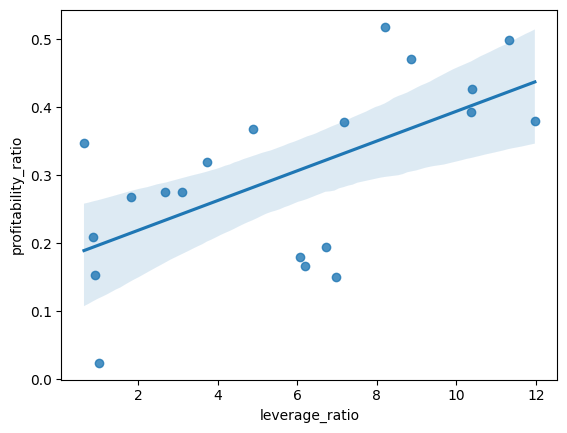

In [16]:
# Create a regression plot to visualize the relationship between leverage_ratio and profitability_ratio
sns.regplot(data=real_estate_df, x='leverage_ratio', y='profitability_ratio')